In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set(style='whitegrid')


In [ ]:
#input data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PlayTennis.csv")
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
data['outlook'] = enc.fit_transform(data['outlook'].values)
data['temp'] = enc.fit_transform(data['temp'].values)
data['humidity'] = enc.fit_transform(data['humidity'].values)
data['wind'] = enc.fit_transform(data['windy'].values)
data['play'] = enc.fit_transform(data['play'].values)

In [ ]:
atr_data = data.drop(columns = 'play')
atr_data.head

<bound method NDFrame.head of     outlook  temp  humidity  windy  wind
0         2     1         0  False     0
1         2     1         0   True     1
2         0     1         0  False     0
3         1     2         0  False     0
4         1     0         1  False     0
5         1     0         1   True     1
6         0     0         1   True     1
7         2     2         0  False     0
8         2     0         1  False     0
9         1     2         1  False     0
10        2     2         1   True     1
11        0     2         0   True     1
12        0     1         1  False     0
13        1     2         0   True     1>

In [ ]:
cls_data = data['play']
cls_data.head()

0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_data, cls_data, test_size = 0.3, random_state = 500)
tree_data = GaussianNB()
tree_data.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
y_pred = tree_data.predict(xtest)
y_pred

array([0, 1, 1, 1, 0])

In [ ]:
tree_data.predict_proba(xtest)

array([[0.85695806, 0.14304194],
       [0.0097225 , 0.9902775 ],
       [0.46915373, 0.53084627],
       [0.05417957, 0.94582043],
       [0.79842154, 0.20157846]])

In [ ]:
tree_data.class_count_

array([3., 6.])

In [ ]:
print('Nilai_akurasi_pada_data_testing:', tree_data.score(xtest, ytest))

Nilai_akurasi_pada_data_testing: 1.0


In [ ]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



[[2 0]
 [0 3]]


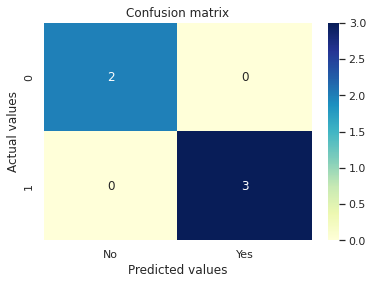

In [ ]:
ConfusionMatrix=confusion_matrix(ytest,y_pred)
print(ConfusionMatrix)
ax=sns.heatmap(ConfusionMatrix,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()